# 프로젝트명 : 1주차 제조데이터 실습코드

### 📌 프로젝트 소개

- 제품 및 공장의 불량률을 나타내는 제조 데이터는 민감한 정보이므로 기업이 공개적으로 공유하지 않는 경우가 많습니다.
- 그럼에도 불구하고 제조 공정의 불량률을 줄이거나 개선하는 데 도움이 될 수 있으므로 중요한 데이터입니다.
- 실제로 현장에서의 목표는 일반적인 데이터 분석처럼 단순히 고성능 예측 모델을 개발하는 것이 아닙니다. 대신 `어떤 요인이 결함에 영향을 미치는지 이해하고 이를 줄이기 위한 효과적인 전략을 결정`하는 데 중점을 둡니다.
- 따라서 데이터 분석가의 임무는 `다양한 데이터를 분석하고 제품 불량 발생률을 줄일 수 있는 솔루션을 제공`하는 것입니다.


### ✅ 데이터 안내
- 본 실습에 사용된 데이터는 실제 제조과정에서 나온 데이터로 익명처리되어 어느 회사의 제품인지 식별이 불가능합니다.
- 제조업 데이터를 다루다 보면 제조업 분야에서 흔히 발생하는 `데이터 불균형`을 자주 접하게 됩니다.
- 비식별화된 제조 데이터에서 `종속변수 Y`는 `제품의 불량 여부`를 나타냅니다.
- X로 표시된 나머지 변수는 독립변수입니다.
|


![워크플로우](https://file.notion.so/f/f/4e4750b9-2973-47f2-9fe5-8330ce1f2c19/475398a6-c3b8-4335-aa31-21706433bb30/%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png?id=394533fb-064a-49a7-b2a8-8ef44889237d&table=block&spaceId=4e4750b9-2973-47f2-9fe5-8330ce1f2c19&expirationTimestamp=1715745600000&signature=6FQpuNkoG-UJfp-FiIfFnwlPC7A7iDe-0RR1PbO-ixg&downloadName=%E1%84%91%E1%85%B3%E1%84%85%E1%85%A6%E1%84%8B%E1%85%B5%E1%86%B7%E1%84%8B%E1%85%AF%E1%84%8F%E1%85%B3.png)

In [ ]:
# 0값이 있는 데이터의 경우, 해당 변수 유무에 따른 성능을 확인해봐야 함.
# 동일한 값이라서 제거 가능

# 피처 중요도 시각화 : 상위 5개(X3, X15, X11, X1, X10)



# 공정데이터에서 어떤 지표를 성능 메인 지표로 잡았는지
# 유의할 점: 과적합

# 불균형 있는 경우 모델 어떻게 해야 할지 생각
# XAI가 모델 -> 어떤 애들이 불량율에 영향을 미치는지

### 1. EDA, 데이터전처리

In [25]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import pandas as pd

In [26]:
import pandas as pd

# Load the data
dataset = pd.read_csv('1주_실습데이터.csv')

# Display a summary description of the data
dataset.describe(include='all')

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
count,527000.000000,527000.000000,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,...,527000.000000,5.270000e+05,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000,527000.000000
mean,0.375129,0.003963,0.455679,1.534800e-02,0.638446,0.037449,0.348374,0.025152,0.602939,0.299989,...,0.680077,2.492619e-01,0.601662,0.603826,0.247010,0.559367,0.025152,0.680077,0.037449,0.108159
std,0.200043,0.004316,0.105150,2.081670e-17,0.139334,0.016994,0.028971,0.003820,0.071272,0.033502,...,0.005244,1.387780e-16,0.065753,0.165551,0.030353,0.013077,0.003820,0.005244,0.016994,0.310582
min,0.000000,0.000000,0.000000,1.534800e-02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.492619e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.204692,0.002366,0.415990,1.534800e-02,0.688810,0.026023,0.344457,0.024164,0.562785,0.295929,...,0.676136,2.492619e-01,0.562785,0.623615,0.243377,0.556788,0.024164,0.676136,0.026023,0.000000
50%,0.399744,0.003523,0.435739,1.534800e-02,0.693147,0.034280,0.345721,0.025805,0.624154,0.296921,...,0.680586,2.492619e-01,0.612178,0.645785,0.244290,0.557708,0.025805,0.680586,0.034280,0.000000
75%,0.545196,0.005094,0.530429,1.534800e-02,0.693147,0.048085,0.346949,0.028069,0.659246,0.297723,...,0.684354,2.492619e-01,0.647685,0.668555,0.245254,0.559589,0.028069,0.684354,0.048085,0.000000
max,0.693147,0.693147,0.693147,1.534800e-02,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,...,0.693147,2.492619e-01,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,1.000000


In [5]:
dataset.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.003560,0.411261,0.015348,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,...,0.682731,0.249262,0.681974,0.016330,0.242926,0.557461,0.028087,0.682731,0.036360,0
1,0.006836,0.007688,0.597304,0.015348,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,...,0.680891,0.249262,0.497403,0.670040,0.245876,0.561336,0.028640,0.680891,0.067407,0
2,0.609621,0.001461,0.466186,0.015348,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,...,0.685525,0.249262,0.647685,0.648486,0.243602,0.559431,0.024502,0.685525,0.018944,0
3,0.074007,0.003072,0.535876,0.015348,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,...,0.677980,0.249262,0.575364,0.632563,0.246078,0.556761,0.025393,0.677980,0.031475,0
4,0.198356,0.007020,0.416238,0.015348,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,...,0.673286,0.249262,0.537143,0.671124,0.245505,0.561695,0.028450,0.673286,0.061888,0


In [13]:
#결측치 확인: 없음
missing_data = dataset.isnull().sum()
print(missing_data)

X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
Y      0
dtype: int64


In [16]:
# 이상치 확인
value_distribution = dataset.iloc[:, 0:20].apply(tuple, axis=1).value_counts(dropna=False)
print(value_distribution)

(0.20229585, 0.003560285, 0.411261, 0.015348, 0.6931472, 0.036359575, 0.3435118, 0.02808741, 0.6819739, 0.29576933, 0.003052697, 0.6827305, 0.2492619, 0.6819739, 0.016330415, 0.24292624, 0.5574611, 0.02808741, 0.6827305, 0.036359575)        1
(0.3911441, 0.003979311, 0.41549286, 0.015348, 0.6931472, 0.038940225, 0.343989, 0.027910678, 0.6706743, 0.297652, 0.00321346, 0.6871989, 0.2492619, 0.6706743, 0.6926588, 0.24318932, 0.5579047, 0.027910678, 0.6871989, 0.038940225)           1
(0.1480382, 0.003695474, 0.41416714, 0.015348, 0.51059484, 0.03655635, 0.34684676, 0.018184038, 0.61217815, 0.2973683, 0.002982204, 0.6709306, 0.2492619, 0.60005677, 0.62232155, 0.2456145, 0.557646, 0.018184038, 0.6709306, 0.03655635)       1
(0.53385305, 0.00216816, 0.50030756, 0.015348, 0.6931472, 0.025253441, 0.34477216, 0.02509674, 0.6476848, 0.2957293, 0.001989632, 0.6829417, 0.2492619, 0.6476848, 0.6358972, 0.24378292, 0.55739945, 0.02509674, 0.6829417, 0.025253441)        1
(0.08911873, 0.003054866, 0.

In [6]:
# 데이터 세트를 입력 데이터와 레이블로 분리
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 학습 데이터로 모델 학습 시키기
model = XGBClassifier()
model.fit(X_train, y_train)

# 테스트 데이터로 예측하기
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

# 정확도 출력하기
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.97%


In [7]:
import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files/Graphviz/bin/'

In [8]:
import os
print(os.environ['PATH'])

c:\Users\USER\projects\test_project\venv\Scripts;C:\Users\USER\projects\test_project\venv\Scripts;C:\app\USER\product\11.2.0\dbhome_1\bin;C:\Windows\system32;C:\Windows;C:\Windows\System32\Wbem;C:\Windows\System32\WindowsPowerShell\v1.0\;C:\Windows\System32\OpenSSH\;C:\Program Files (x86)\NVIDIA Corporation\PhysX\Common;C:\Program Files\NVIDIA Corporation\NVIDIA NvDLISR;C:\Program Files\Git\cmd;C:\Users\USER\AppData\Local\Programs\Python\Python39\Scripts\;C:\Users\USER\AppData\Local\Programs\Python\Python39\;C:\Users\USER\AppData\Local\Microsoft\WindowsApps;C:\Users\USER\AppData\Local\Programs\Microsoft VS Code\bin;C:\Users\USER\AppData\Local\GitHubDesktop\bin;C:/Program Files/Graphviz/bin/


### 가지치기

In [50]:
from xgboost import plot_tree
import matplotlib.pyplot as plt ## 차트를 그리기 위한 라이브러리
from matplotlib.pylab import rcParams ## 차트의 크기를 조절하기 위한 라이브러리

## 오류 무시
import warnings
warnings.filterwarnings('ignore')

rcParams['figure.figsize'] = 200, 100 ## 차트의 크기를 조절

## 트리를 그린다.
plot_tree(model)
plt.show() ## 차트를 보여준다.

In [52]:
depth_4_model = XGBClassifier(max_depth=4)
depth_4_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=4, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [53]:
plot_tree(depth_4_model)
plt.show() 

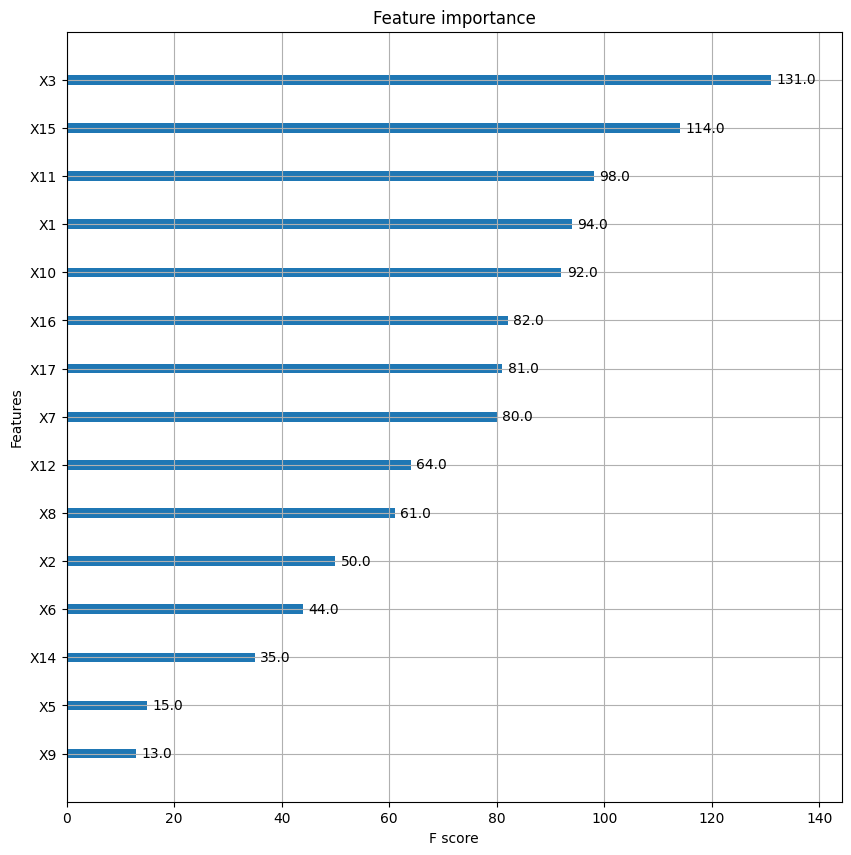

In [55]:
# 피처 중요도 시각화 : 상위 5개(X3, X15, X11, X1, X10)
from xgboost import plot_importance

rcParams['figure.figsize'] = 10, 10

plot_importance(depth_4_model)
plt.show() 

In [22]:
dataset.dtypes

X1     float64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
Y        int64
dtype: object

           X1        X2        X3  X4        X5        X6        X7        X8  \
X1   1.000000  0.007232  0.013173 NaN -0.004800  0.020829  0.042191  0.012175   
X2   0.007232  1.000000 -0.001012 NaN -0.032625  0.340155  0.039338  0.145483   
X3   0.013173 -0.001012  1.000000 NaN  0.670508  0.050037 -0.065134  0.287924   
X4        NaN       NaN       NaN NaN       NaN       NaN       NaN       NaN   
X5  -0.004800 -0.032625  0.670508 NaN  1.000000 -0.026790 -0.015887  0.378455   
X6   0.020829  0.340155  0.050037 NaN -0.026790  1.000000  0.057066  0.328973   
X7   0.042191  0.039338 -0.065134 NaN -0.015887  0.057066  1.000000 -0.016945   
X8   0.012175  0.145483  0.287924 NaN  0.378455  0.328973 -0.016945  1.000000   
X9  -0.088833 -0.198944  0.157079 NaN  0.306740 -0.385757 -0.118575  0.274797   
X10  0.031044  0.030899 -0.064809 NaN -0.000004  0.039044  0.952678  0.005087   
X11 -0.002123  0.253008 -0.024815 NaN -0.041576  0.250940  0.041972  0.102776   
X12 -0.051532 -0.134583 -0.0

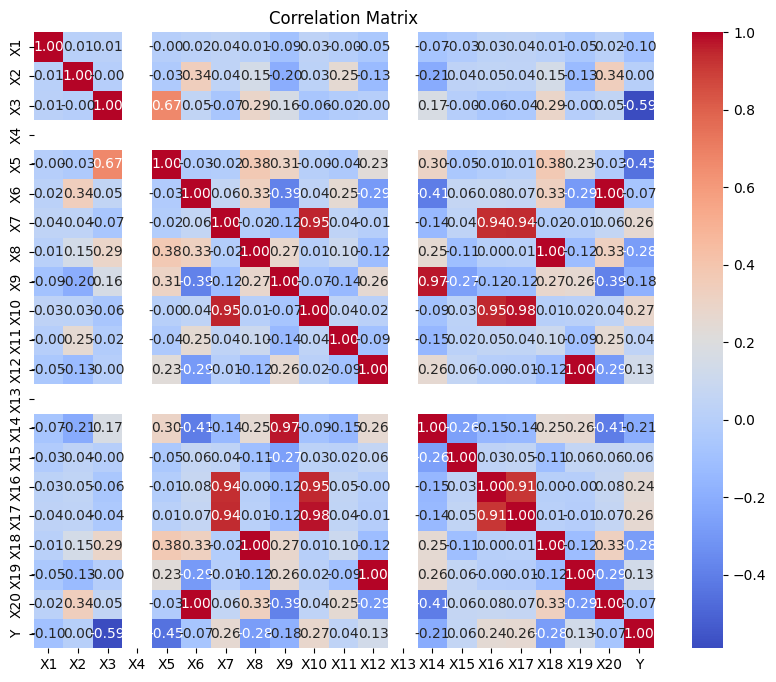

In [21]:
#상관계수 : X4, X13 제거
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = dataset.corr()

# 상관계수 행렬 출력
print(correlation_matrix)

# 상관계수 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix')
plt.show()

### 1. 이상치 확인 : X4, X13 동일한 값

In [33]:
dataset['X4'].unique()

array([0.015348])

In [34]:
dataset['X13'].unique()

array([0.2492619])

In [43]:
# 0값 확인
zero_counts = dataset.loc[:, 'X1':'X20'].apply(lambda x: (x == 0).sum())

zero_counts

X1         4
X2         1
X3     17360
X4         0
X5     17358
X6         1
X7         2
X8         1
X9         1
X10        2
X11        1
X12        1
X13        0
X14        1
X15       41
X16        2
X17        2
X18        1
X19        1
X20        1
dtype: int64

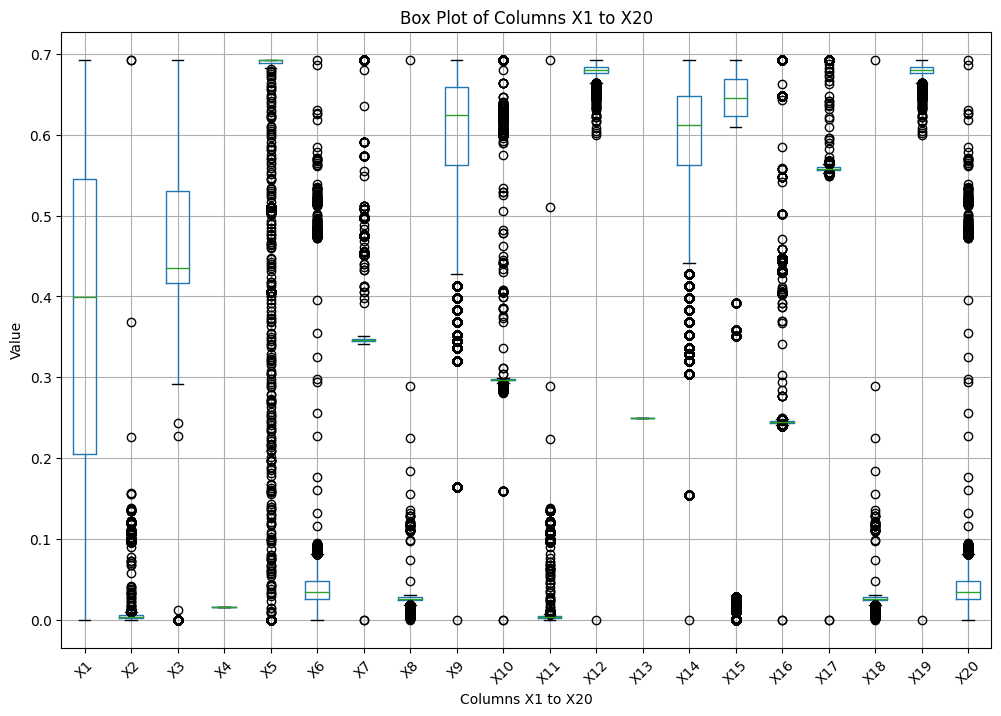

In [46]:
#상자수염
import matplotlib.pyplot as plt

# X1부터 X20까지의 열을 선택하여 박스 플롯 생성
plt.figure(figsize=(12, 8))
data.loc[:, 'X1':'X20'].boxplot()
plt.title('Box Plot of Columns X1 to X20')
plt.ylabel('Value')
plt.xlabel('Columns X1 to X20')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

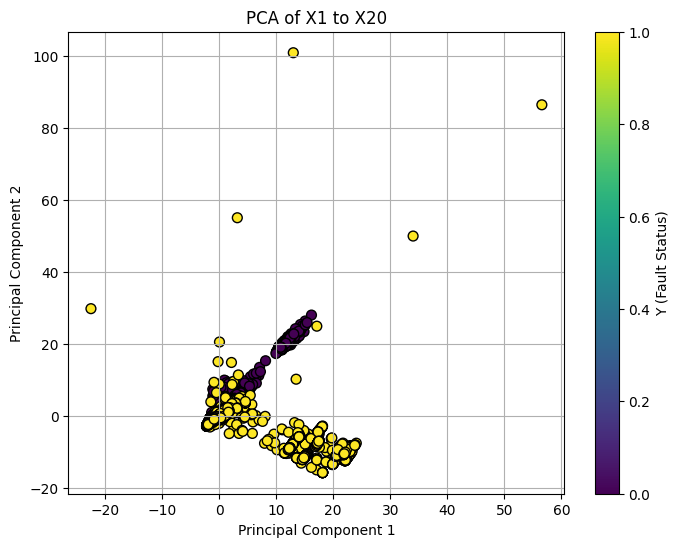

Explained variance ratio: [0.22765017 0.18867913]


In [48]:
#주성분
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# 데이터 전처리
# X1부터 X20까지의 데이터를 선택하고 표준화
X = dataset.loc[:, 'X1':'X20']
y = dataset['Y']  # Y 불량 여부 열
X_scaled = StandardScaler().fit_transform(X)

# PCA 모델 적합
pca = PCA(n_components=2)  # 2차원으로 축소
X_pca = pca.fit_transform(X_scaled)

# PCA 결과 시각화
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of X1 to X20')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Y (Fault Status)')
plt.grid(True)
plt.show()

# 설명된 분산 비율 확인
print("Explained variance ratio:", pca.explained_variance_ratio_)

### SHAP

In [57]:
import warnings
warnings.filterwarnings('ignore')

import shap 
from sklearn.model_selection import train_test_split
import pandas as pd

import ssl
ssl._create_default_https_context = ssl._create_unverified_context


data = pd.read_csv('1주_실습데이터.csv')
df = dataset[dataset.columns[:]]
X = df
X_features = X.columns[:-1]

y = dataset.columns[-1]

X.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X12,X13,X14,X15,X16,X17,X18,X19,X20,Y
0,0.202296,0.003560,0.411261,0.015348,0.693147,0.036360,0.343512,0.028087,0.681974,0.295769,...,0.682731,0.249262,0.681974,0.016330,0.242926,0.557461,0.028087,0.682731,0.036360,0
1,0.006836,0.007688,0.597304,0.015348,0.686838,0.067407,0.347869,0.028640,0.497403,0.297943,...,0.680891,0.249262,0.497403,0.670040,0.245876,0.561336,0.028640,0.680891,0.067407,0
2,0.609621,0.001461,0.466186,0.015348,0.693090,0.018944,0.345032,0.024502,0.647685,0.298255,...,0.685525,0.249262,0.647685,0.648486,0.243602,0.559431,0.024502,0.685525,0.018944,0
3,0.074007,0.003072,0.535876,0.015348,0.693147,0.031475,0.347502,0.025393,0.587787,0.296057,...,0.677980,0.249262,0.575364,0.632563,0.246078,0.556761,0.025393,0.677980,0.031475,0
4,0.198356,0.007020,0.416238,0.015348,0.686838,0.061888,0.347441,0.028450,0.537143,0.298167,...,0.673286,0.249262,0.537143,0.671124,0.245505,0.561695,0.028450,0.673286,0.061888,0


In [59]:
X_train, X_test, y_train, y_test = train_test_split(df[X_features], df['Y'], test_size=0.2, random_state=1)

In [60]:
X_train.head(10)


,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20
524331,0.466452,0.003415,0.394744,0.015348,0.510595,0.029154,0.343768,0.025567,0.612178,0.298805,0.003224,0.682087,0.249262,0.612178,0.624653,0.241855,0.559677,0.025567,0.682087,0.029154
20387,0.422958,0.003501,0.480293,0.015348,0.693147,0.035310,0.342694,0.027944,0.693147,0.295609,0.002892,0.683413,0.249262,0.681974,0.019298,0.242024,0.557007,0.027944,0.683413,0.035310
511534,0.049564,0.003263,0.397361,0.015348,0.693147,0.028531,0.342233,0.024778,0.659246,0.295929,0.002963,0.686466,0.249262,0.647685,0.637721,0.240839,0.556062,0.024778,0.686466,0.028531
35828,0.631273,0.005841,0.434358,0.015348,0.693147,0.054046,0.347458,0.028147,0.587787,0.295129,0.004383,0.675325,0.249262,0.575364,0.679574,0.245825,0.553521,0.028147,0.675325,0.054046
86723,0.676033,0.003925,0.412840,0.015348,0.693147,0.038650,0.346715,0.026316,0.575364,0.298007,0.003160,0.673862,0.249262,0.575364,0.631971,0.245024,0.559259,0.026316,0.673862,0.038650
428335,0.275276,0.004058,0.415741,0.015348,0.693147,0.040861,0.343982,0.027953,0.670674,0.297368,0.003360,0.686276,0.249262,0.659246,0.691849,0.243189,0.557912,0.027953,0.686276,0.040861
179520,0.093082,0.005576,0.421355,0.015348,0.405465,0.050938,0.346133,0.028156,0.635989,0.295396,0.004322,0.676421,0.249262,0.624154,0.675607,0.245291,0.553044,0.028156,0.676421,0.050938
150369,0.216706,0.001761,0.410679,0.015348,0.693147,0.021620,0.344496,0.024896,0.659246,0.298053,0.001686,0.683907,0.249262,0.659246,0.640098,0.243335,0.556679,0.024896,0.683907,0.021620
134698,0.488793,0.002374,0.410596,0.015348,0.693147,0.026706,0.344258,0.025012,0.647685,0.295929,0.002060,0.683233,0.249262,0.647685,0.635493,0.243242,0.557759,0.025012,0.683233,0.026706
385690,0.434532,0.002319,0.429308,0.015348,0.693147,0.024893,0.346473,0.017883,0.624154,0.296729,0.001974,0.683632,0.249262,0.624154,0.619016,0.244916,0.556514,0.017883,0.683632,0.024893


In [62]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
import numpy as np
import xgboost 

model = xgboost.XGBRegressor(random_state=0)
model.fit(X_train, y_train)

preds = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, preds))

print("RMSE", round(rmse,2))

RMSE 0.02


In [65]:
!pip install pdpbox
from pdpbox import info_plots

pima_feature = X_train.columns
pima_target = 'Outcome'

target_plot = info_plots.TargetPlot(
    df=dataset,
    feature='X3',
    feature_name='X3',
    target='Y',
)

You should consider upgrading via the 'c:\users\user\projects\test_project\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
#  X축은 X3변수, Y축은 불량율

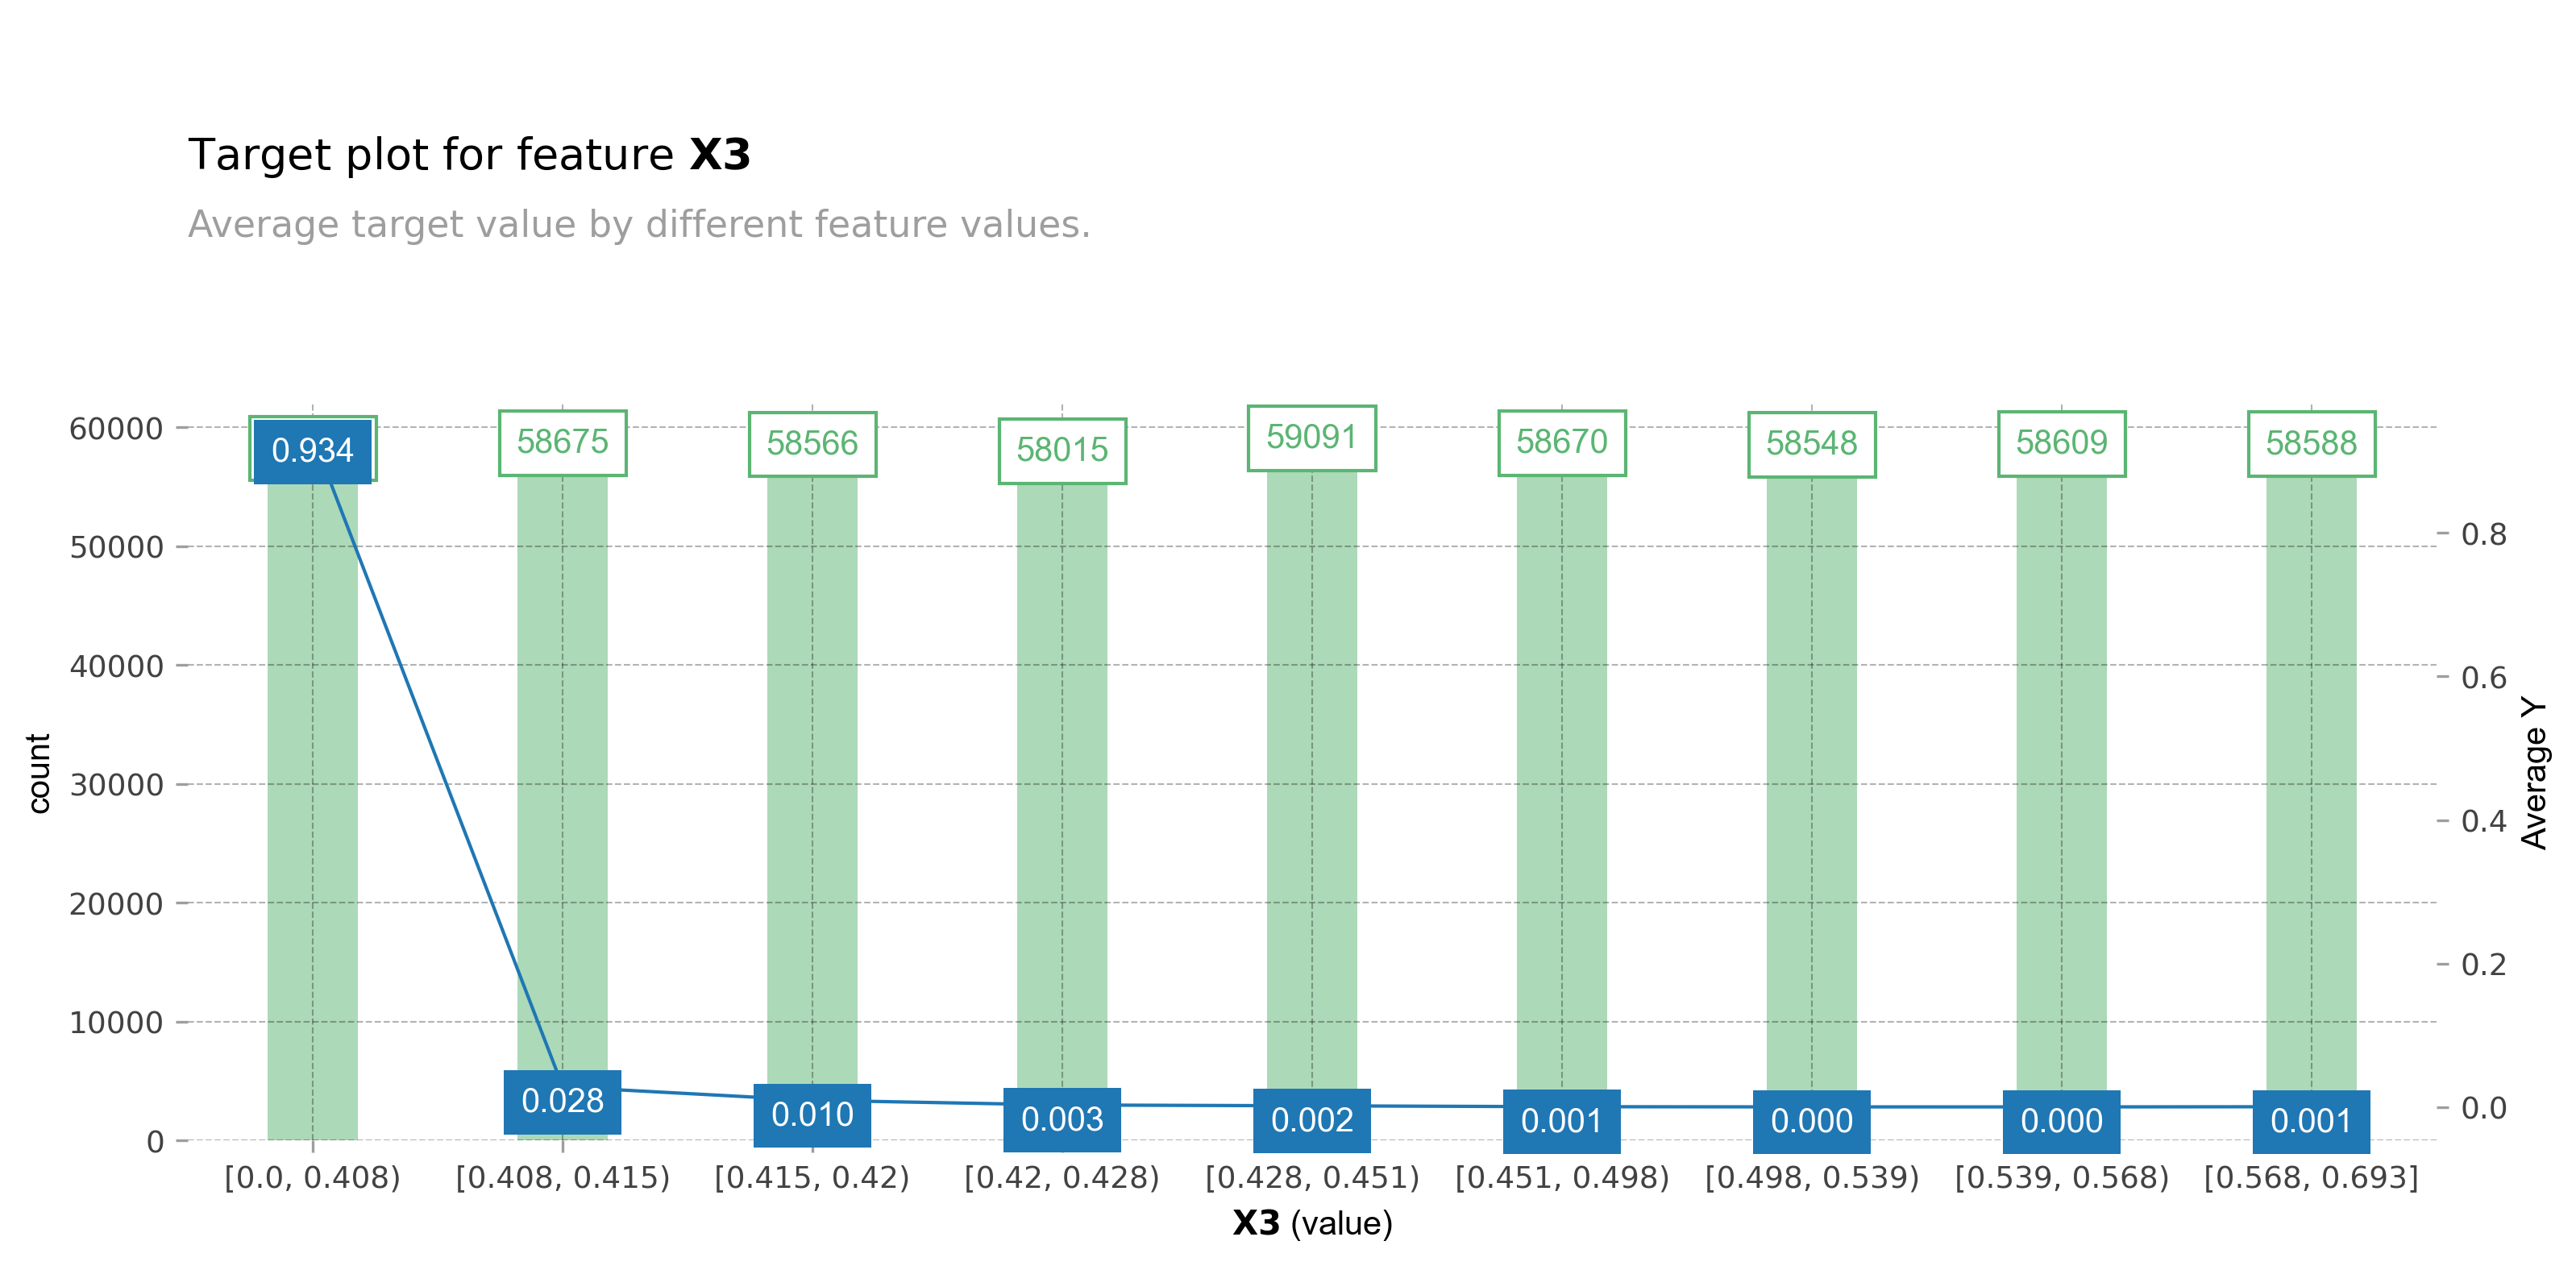

In [66]:
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

In [ ]:
#  X축은 X15변수, Y축은 불량율

In [67]:
pima_feature = X_train.columns
pima_target = 'Outcome'

target_plot = info_plots.TargetPlot(
    df=dataset,
    feature='X15',
    feature_name='X15',
    target='Y',
)

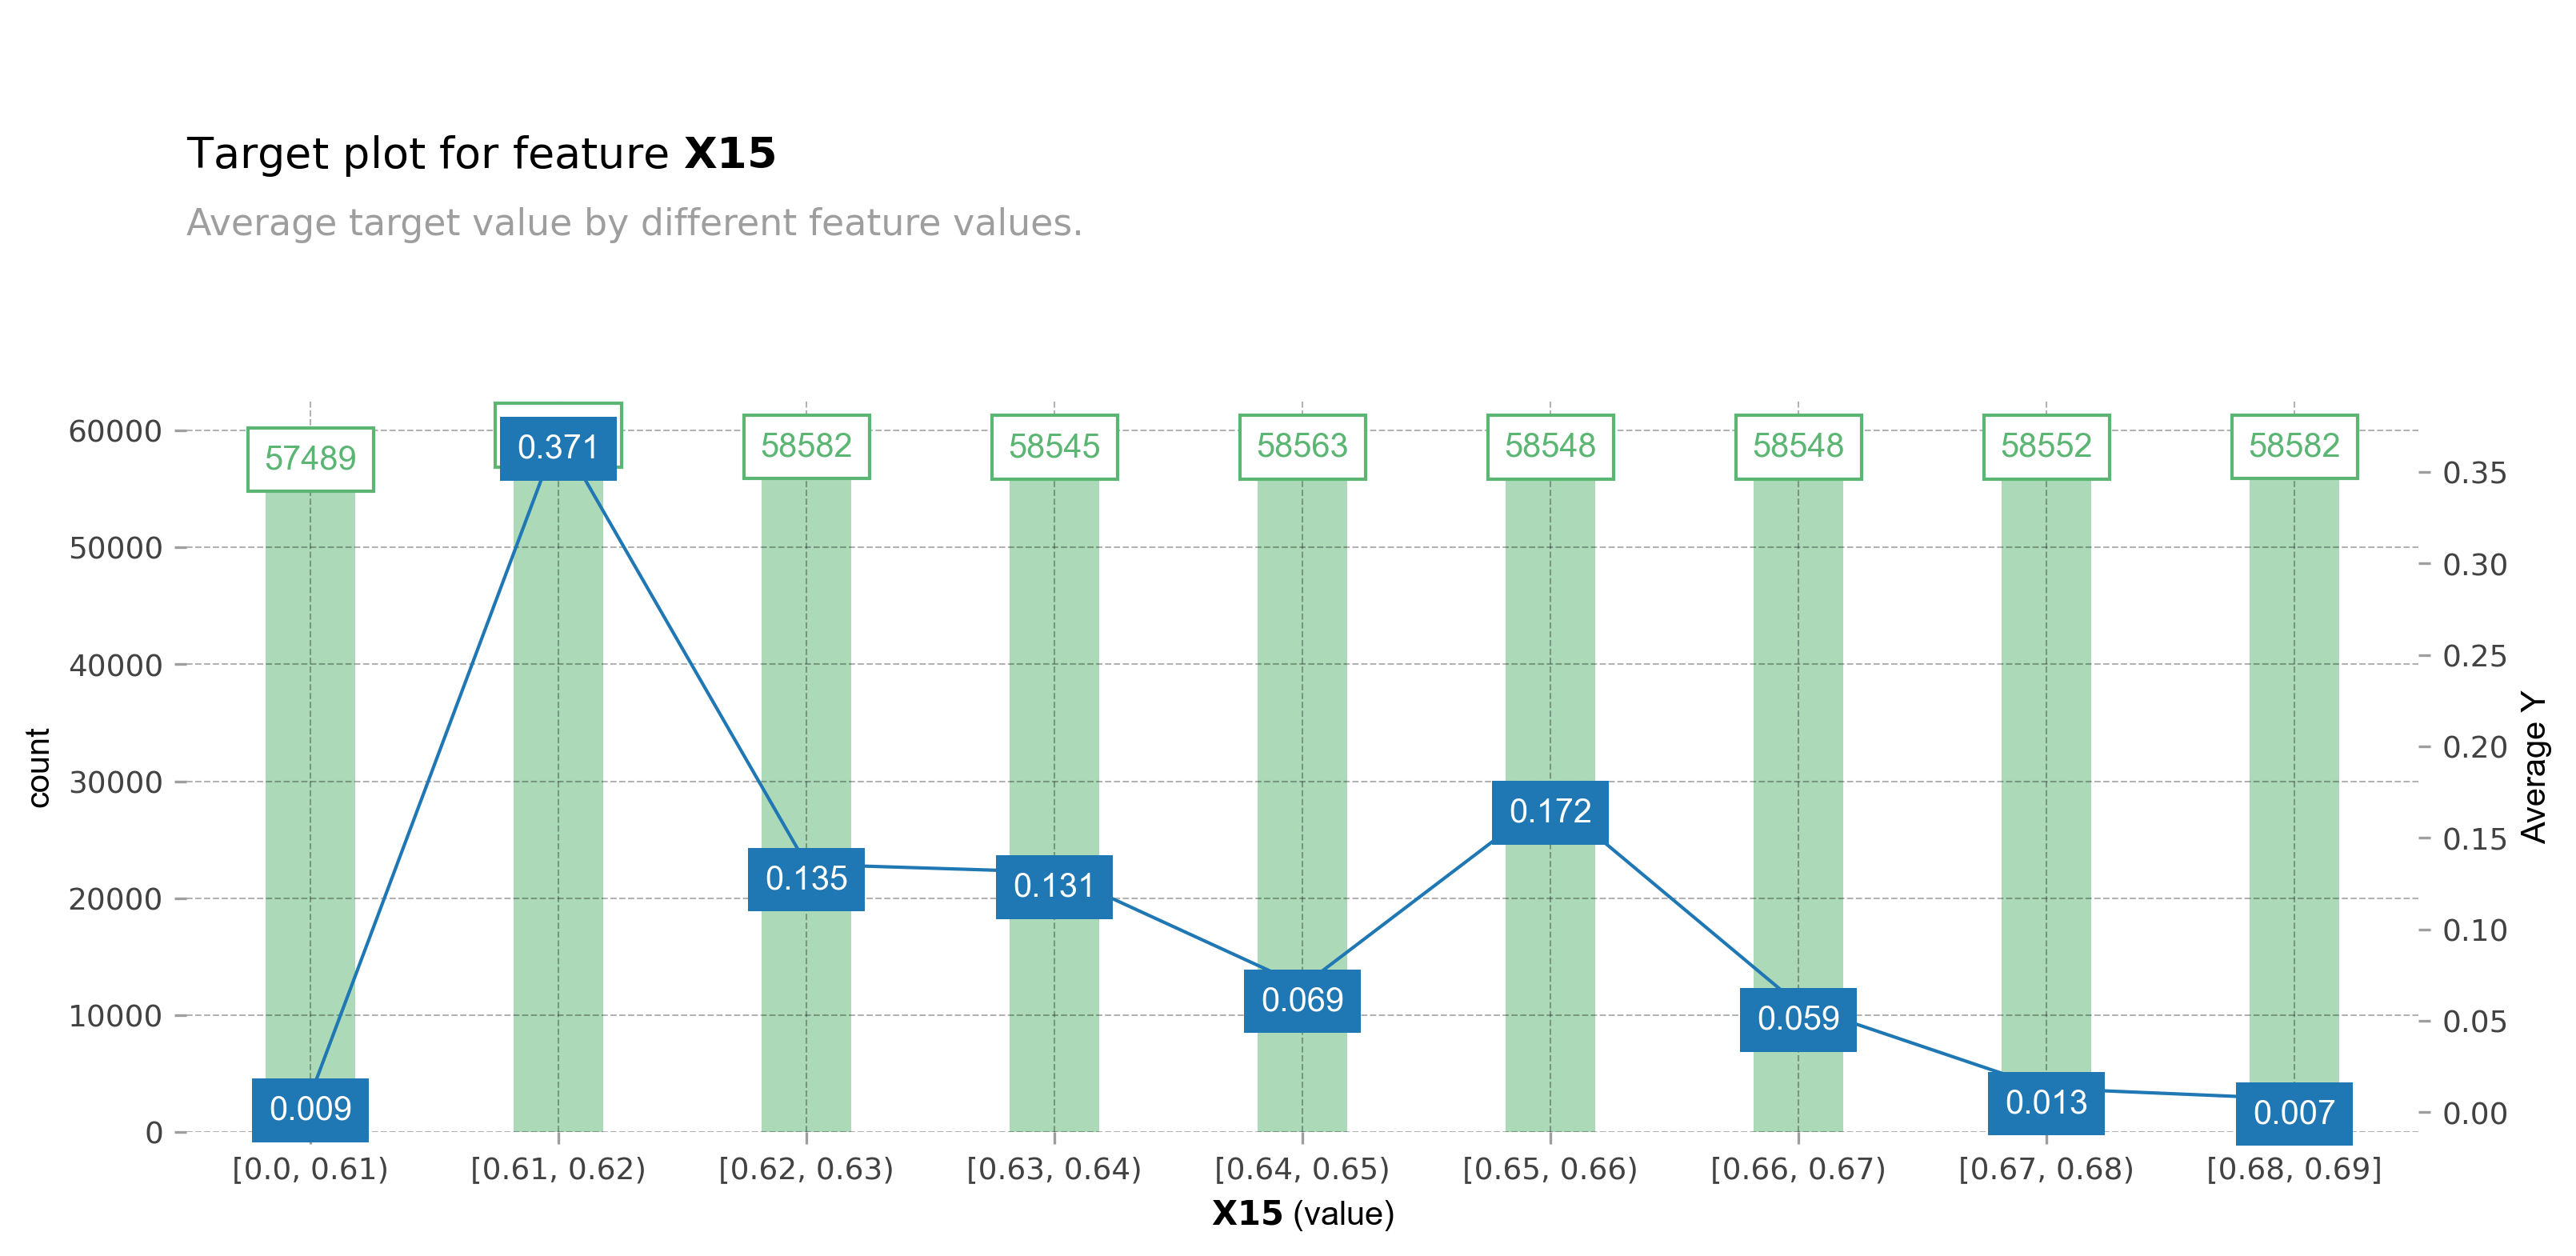

In [68]:
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

In [69]:
pima_feature = X_train.columns
pima_target = 'Outcome'

target_plot = info_plots.TargetPlot(
    df=dataset,
    feature='X11',
    feature_name='X11',
    target='Y',
)

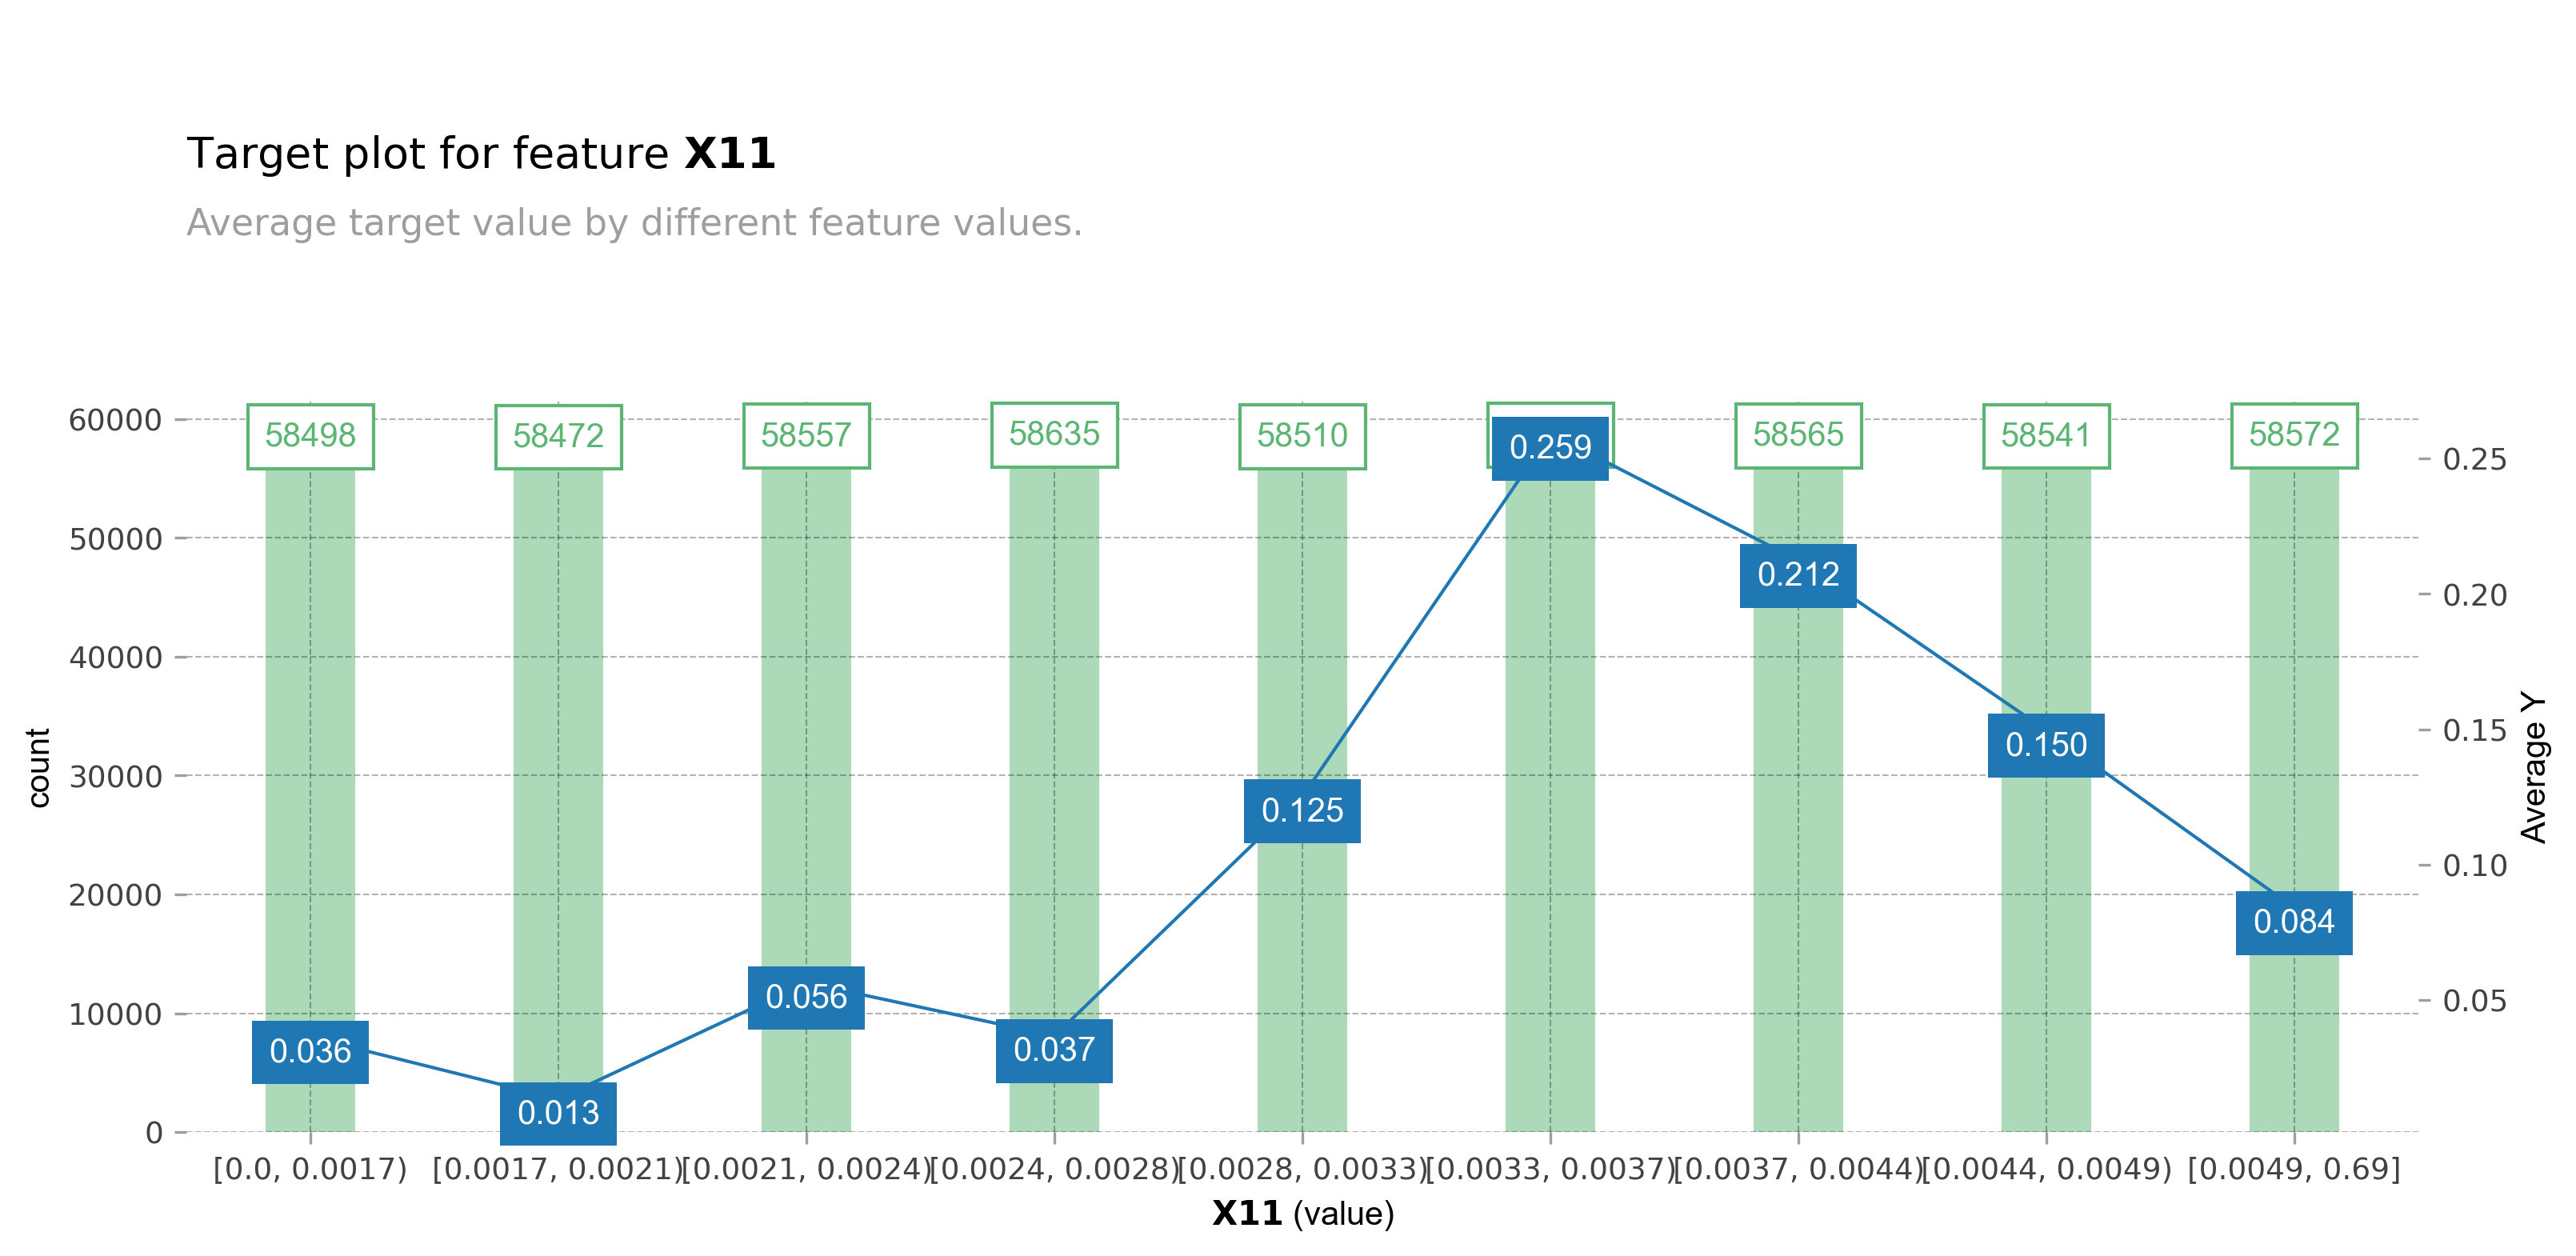

In [70]:
fig, axes, summary_df = target_plot.plot(
    figsize=(12, 6),
    plot_params=None,
    engine='matplotlib',
)

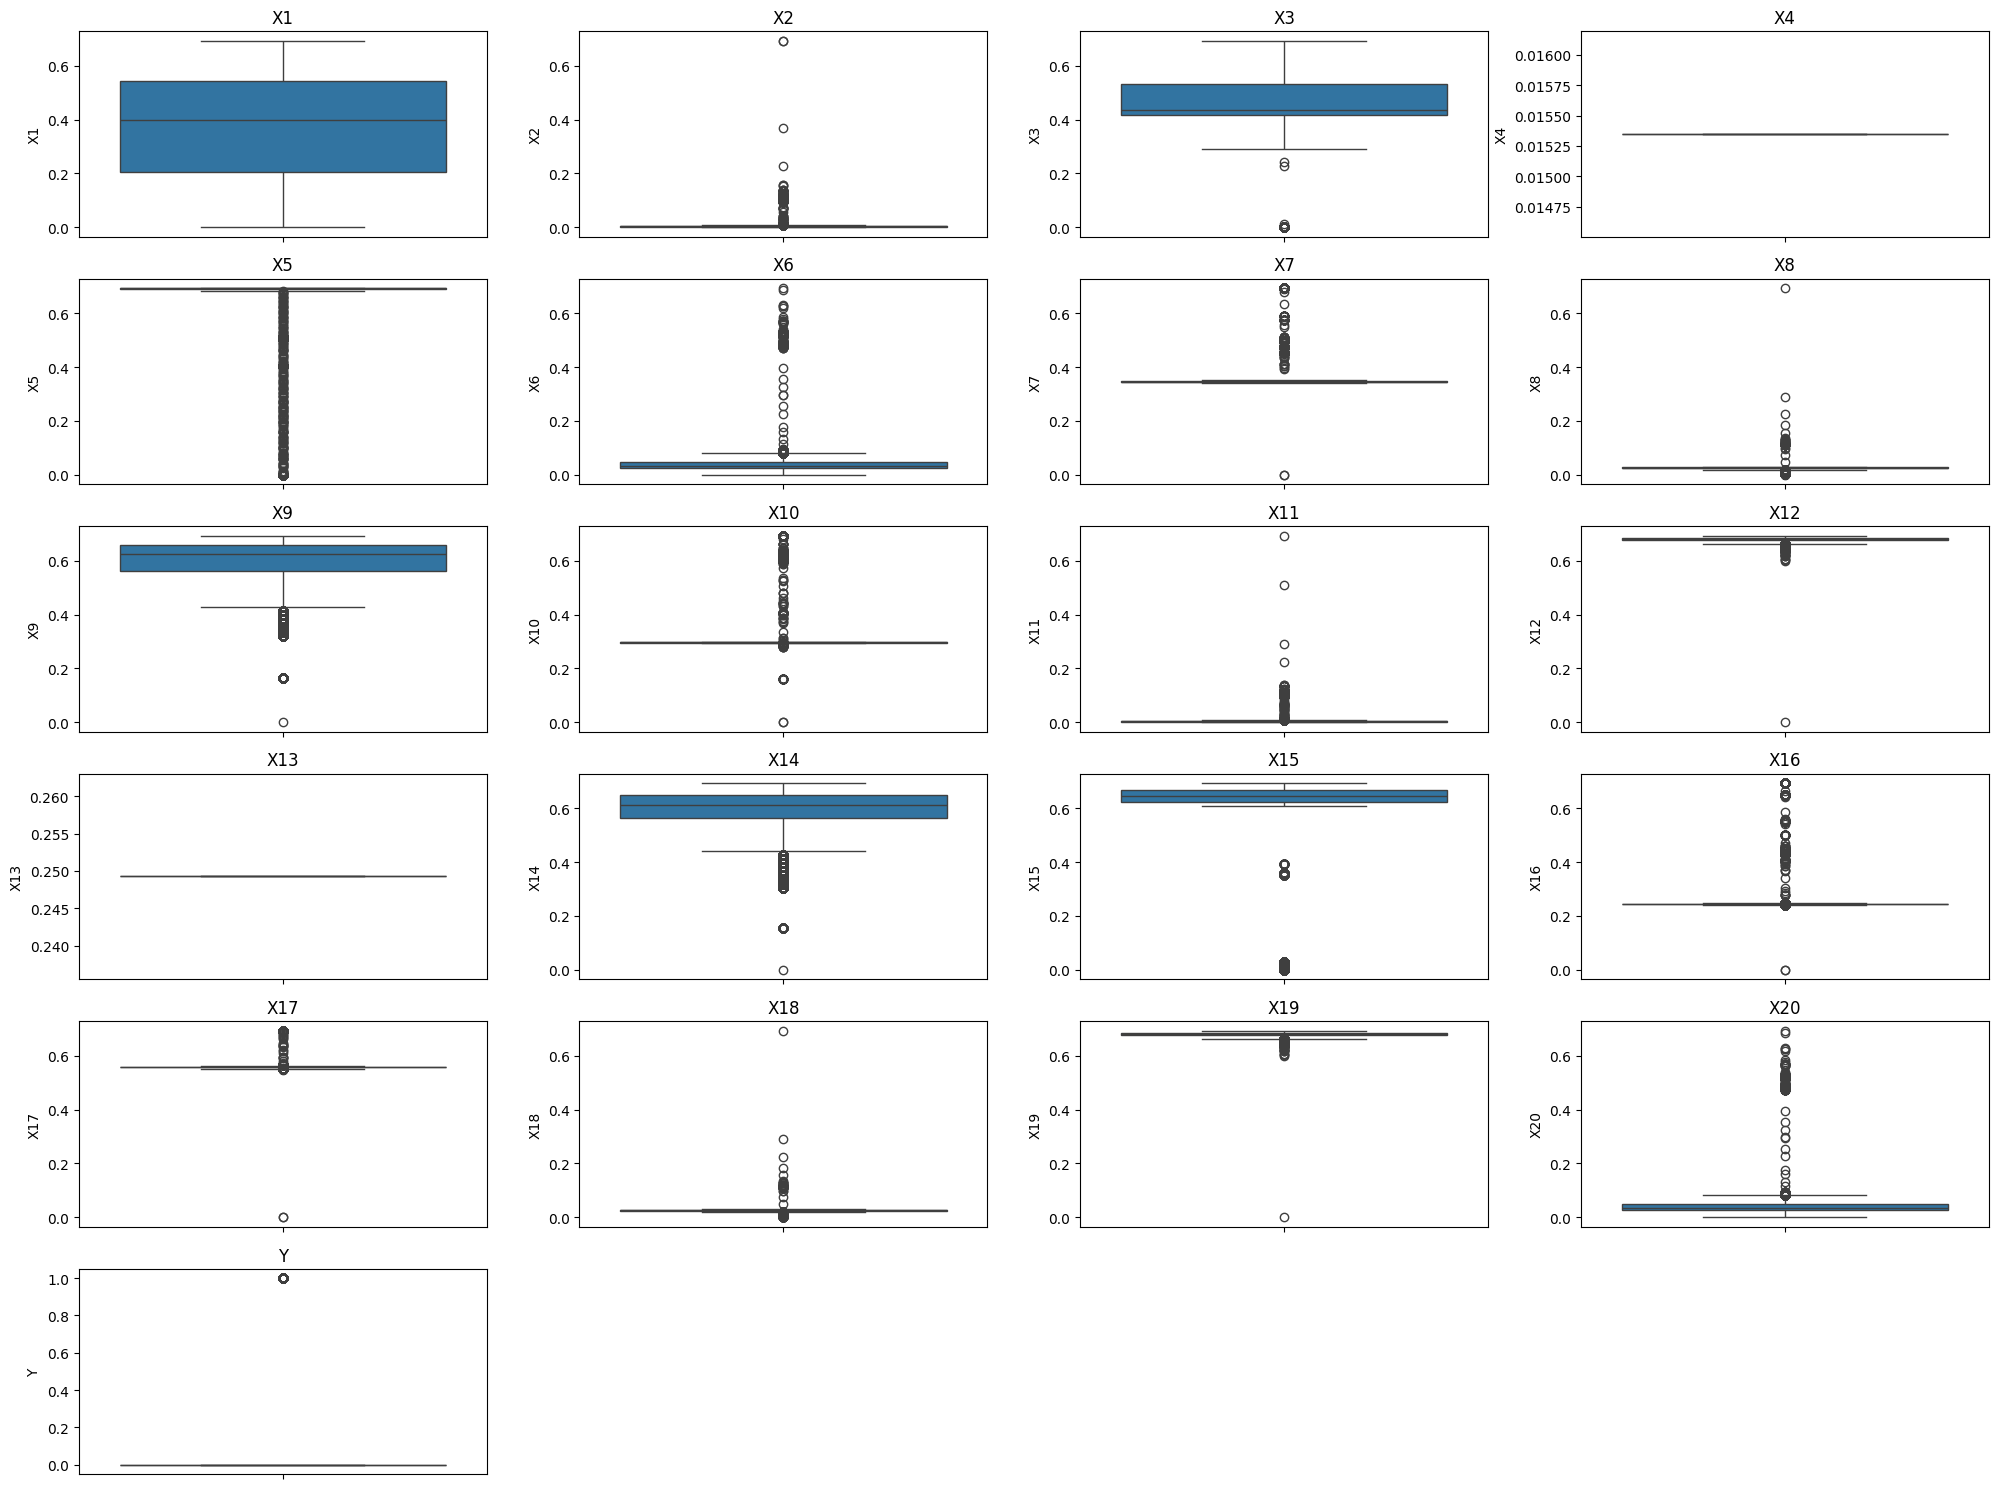

In [73]:
# 모든 열에 대해 상자 그림 (Box Plot) 그리기
plt.figure(figsize=(20, 15))
for i, col in enumerate(dataset.columns):
    plt.subplot(len(dataset.columns) // 4 + 1, 4, i + 1)
    sns.boxplot(y=dataset[col])
    plt.title(col)
plt.tight_layout()
plt.show()